<a href="https://colab.research.google.com/github/itsparmeet007/ML-Projects/blob/main/SMS_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #For numerical operations
import pandas as pd # For data manuplation and analysis
import matplotlib.pyplot as plt # For data Visualisation
import seaborn as sns

# importing the data File reading and Data processing

df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
# here we can see/ Identify our targeted Column ["Prediction"]
df.columns


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Libraries from sklearn and visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
# Here we can see No Duplicates
df.describe(include = 'object').T

,count,unique,top,freq
Email No.,5172,5172,Email 5172,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
# Here we can No. of Hams and Spams in the data
df['Prediction'].value_counts(normalize= True)

,proportion
Prediction,
0,0.709977
1,0.290023


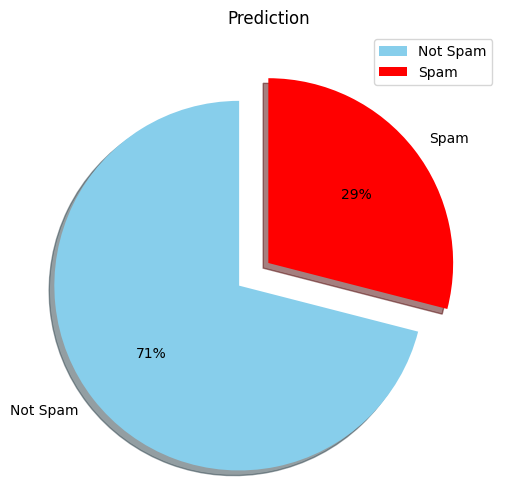

In [ ]:
# Visualising the Data
import matplotlib.pyplot as plt

counts = df['Prediction'].value_counts(normalize = True)
plt.figure(figsize =(10,6))
explode = [0.2 ,0]
plt.pie(counts.values * 100 ,
        labels = ["Not Spam","Spam"],
        autopct ="%1.0f%%",
        explode = explode,
        colors = ['skyBlue','red'],
        startangle=90,
        shadow = True)
plt.legend()
plt.title("Prediction")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Removing Unnecessary Coloumns
df.drop(columns = ['Email No.'])

#Why?
# Because it contains no information about spam/ham.
# It would confuse the model.

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


**Divides your dataset into:**

80% training → used for learning patterns

20% testing → used to evaluate the model on unseen emails

**random_state=26**

Ensures you always get the same split every time you run the code

Good for reproducibility

In [ ]:
X = df.drop(['Email No.','Prediction'], axis= 1)
Y = df['Prediction']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 26)

**🔍 Understanding Logistic Regression Code (Step by Step)**

# **1. Import Libraries**
**from sklearn.feature_extraction.text import TfidfVectorizer**

**from sklearn.linear_model import LogisticRegression**

**from sklearn.metrics import classification_report, accuracy_score**

**✔ What this means:**

**TfidfVectorizer →** Converts email text into numbers (TF-IDF scores).

**LogisticRegression →** The machine learning algorithm used to classify spam/not spam.

**classification_report, accuracy_score →** Used to evaluate model performance.

**TF-IDF = Term Frequency – Inverse Document Frequency**

Why?

Machine learning models cannot understand text directly → they need numbers.

TF-IDF highlights important words and reduces the weight of common words.

# **Train Logistic Regression**
**✔ What this means:**

Creates a Logistic Regression model.

**max_iter=2000:** increases the number of training cycles so the model converges.

**✔ What the model does:**

It finds patterns in text that indicate spam or not spam.

**For example:**

Words like "win", "prize", "free", "credit" → likely spam

Words like "meeting", "schedule", "project" → likely not spam

It learns these patterns from your training data.